# Data Modeling

In this notebook I will cluster both the customer and seasonality dataset

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hdbscan

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:
# Load in libraries

# Loading customer scaled dataset.
ds_cust=pd.read_csv('../data/Customer_scaled.csv')

# Loading seasonality scaled dataset.
ds_sea=pd.read_csv('../data/Seasonality_scaled.csv')


In [3]:
# Checking that ds_cust loaded properly

ds_cust

,CustomerTotalSpend,CustomerOrderCount,AvgOrderValue,AvgDiscountRate,AvgQuantity,AvgSunkCost
0,-1.214174,-1.044505,-1.356249,0.412296,-1.860116,-1.393696
1,-0.337423,0.546457,-0.671998,0.094130,-0.000458,-0.476196
2,-1.028223,-1.044505,-0.833763,1.207713,1.859200,-0.177815
3,-0.361546,0.546457,-0.694592,1.684962,-0.623443,-0.579382
4,-0.367946,-1.044505,1.021492,2.003129,0.929371,1.173068
...,...,...,...,...,...,...
43228,3.185470,-0.249024,4.722165,-1.178536,1.859200,4.042512
43229,0.181128,-1.044505,2.564284,-1.178536,-0.000458,2.687330
43230,-0.468757,-0.249024,-0.411639,-1.178536,-0.930287,-0.664511
43231,-1.021769,-1.044505,-0.815627,2.003129,-0.930287,-0.925917


In [4]:
# Checking that ds_sea loaded properly.

ds_sea

,CustomerTotalSpend,CustomerOrderCount,AvgOrderValue,AvgDiscountRate,AvgQuantity,AvgSunkCost,OrdersInMonth_1,OrdersInMonth_2,OrdersInMonth_3,OrdersInMonth_4,...,PctOrdersInMonth_OrdersInMonth_3,PctOrdersInMonth_OrdersInMonth_4,PctOrdersInMonth_OrdersInMonth_5,PctOrdersInMonth_OrdersInMonth_6,PctOrdersInMonth_OrdersInMonth_7,PctOrdersInMonth_OrdersInMonth_8,PctOrdersInMonth_OrdersInMonth_9,PctOrdersInMonth_OrdersInMonth_10,PctOrdersInMonth_OrdersInMonth_11,PctOrdersInMonth_OrdersInMonth_12
0,-1.214174,-1.044505,-1.356249,0.412296,-1.860116,-1.393696,-0.452415,-0.428299,-0.446383,-0.442042,...,-0.399174,-0.394401,-0.402466,-0.397179,4.288746,-0.404826,-0.395376,-0.394766,-0.390965,-0.398805
1,-0.337423,0.546457,-0.671998,0.094130,-0.000458,-0.476196,-0.452415,2.002348,1.840707,-0.442042,...,1.168632,-0.394401,-0.402466,-0.397179,1.148283,-0.404826,-0.395376,-0.394766,-0.390965,-0.398805
2,-1.028223,-1.044505,-0.833763,1.207713,1.859200,-0.177815,-0.452415,-0.428299,-0.446383,-0.442042,...,-0.399174,-0.394401,-0.402466,-0.397179,-0.398512,-0.404826,-0.395376,-0.394766,-0.390965,4.376985
3,-0.361546,0.546457,-0.694592,1.684962,-0.623443,-0.579382,-0.452415,-0.428299,-0.446383,-0.442042,...,-0.399174,-0.394401,-0.402466,2.806876,1.148283,-0.404826,-0.395376,-0.394766,-0.390965,-0.398805
4,-0.367946,-1.044505,1.021492,2.003129,0.929371,1.173068,-0.452415,-0.428299,1.840707,-0.442042,...,4.351753,-0.394401,-0.402466,-0.397179,-0.398512,-0.404826,-0.395376,-0.394766,-0.390965,-0.398805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43228,3.185470,-0.249024,4.722165,-1.178536,1.859200,4.042512,1.811913,-0.428299,-0.446383,-0.442042,...,-0.399174,-0.394401,-0.402466,-0.397179,-0.398512,-0.404826,-0.395376,-0.394766,-0.390965,1.989090
43229,0.181128,-1.044505,2.564284,-1.178536,-0.000458,2.687330,-0.452415,-0.428299,-0.446383,-0.442042,...,-0.399174,-0.394401,-0.402466,4.384993,-0.398512,-0.404826,-0.395376,-0.394766,-0.390965,-0.398805
43230,-0.468757,-0.249024,-0.411639,-1.178536,-0.930287,-0.664511,-0.452415,-0.428299,-0.446383,-0.442042,...,-0.399174,-0.394401,-0.402466,-0.397179,-0.398512,1.924733,1.986182,-0.394766,-0.390965,-0.398805
43231,-1.021769,-1.044505,-0.815627,2.003129,-0.930287,-0.925917,-0.452415,-0.428299,-0.446383,-0.442042,...,-0.399174,-0.394401,-0.402466,-0.397179,-0.398512,4.254291,-0.395376,-0.394766,-0.390965,-0.398805


### Customer clustering

In [5]:
# Calculating the silhouette scores to determine the optimal number of clusters

cust_sil_scores={}

for k in range(2,11):
    km=KMeans(n_clusters=k, random_state=42)
    c_labels=km.fit_predict(ds_cust)
    c_sil=silhouette_score(ds_cust,c_labels)
    cust_sil_scores[k]=c_sil
cust_sil_scores

{2: 0.28669083943971885,
 3: 0.20998162337210277,
 4: 0.24261049982619595,
 5: 0.24493101427799174,
 6: 0.24179644181732762,
 7: 0.23115345203271864,
 8: 0.2294869023388022,
 9: 0.2218395431377356,
 10: 0.22515754027910553}

In [6]:
# Sorting the customer silhouette scores
cs=pd.DataFrame(cust_sil_scores.items(), columns=['k', 'silhouette_score'])
cs_sorted=cs.sort_values('silhouette_score', ascending=False).reset_index(drop=True)
print(cs_sorted)

    k  silhouette_score
0   2          0.286691
1   5          0.244931
2   4          0.242610
3   6          0.241796
4   7          0.231153
5   8          0.229487
6  10          0.225158
7   9          0.221840
8   3          0.209982


Looking at the silhouette score for the customer data, the optimal number of clusters per the silhouette score is 2 clusters. However, that is just splitting the dataset in half. Therefore I will use the next best which is 5 clusters

In [7]:
# Fitting kmeans with 5 clusters
c_kmeans=KMeans(n_clusters=5, random_state=42)
c_kmeans_labels=c_kmeans.fit_predict(ds_cust)

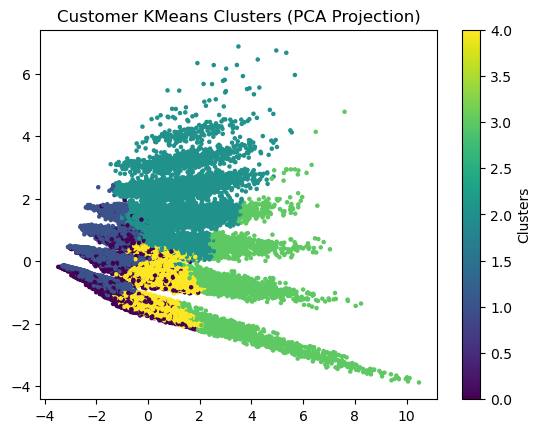

In [18]:
# Visualizing the clusters with PCA

c_PCA=PCA(n_components=2)
c_cust_PCA=c_PCA.fit_transform(ds_cust)

plt.scatter(c_cust_PCA[:,0], c_cust_PCA[:,1], c=c_kmeans_labels,cmap='viridis', s=5)
plt.colorbar(label='Clusters')
plt.title ("Customer KMeans Clusters (PCA Projection)")
plt.show()

In [9]:
# Creating a copy of the dataframe
ds_kmeans=ds_cust.copy()

# adding the kmeans data
ds_kmeans['cluster']=c_kmeans_labels
kmeans_summary=ds_kmeans.groupby('cluster').mean()
print("KMeans Cluster Summary:")
print(kmeans_summary)

KMeans Cluster Summary:
         CustomerTotalSpend  CustomerOrderCount  AvgOrderValue  \
cluster                                                          
0                 -0.575097           -0.412559      -0.448805   
1                 -0.749599           -0.361097      -0.772772   
2                  1.076899            1.320237       0.142095   
3                  1.110815           -0.364820       2.240922   
4                 -0.262991           -0.516368       0.209583   

         AvgDiscountRate  AvgQuantity  AvgSunkCost  
cluster                                             
0               1.534044    -0.103398    -0.315532  
1              -0.423547    -1.004855    -0.866667  
2              -0.020961     0.112467     0.141761  
3              -0.101054     1.082173     2.196620  
4              -0.489831     0.711930     0.245120  


#### KMeans Interpretation

- Cluster 0 : Customers in Cluster 0 are sensitive on discounts. They are more likely to purchase the item if it has a discount.
- Cluster 1 : Customers in Cluster 1 are low-value low-engangement buyers. They spend very little and don't buy a lot or use discounts.
- Cluster 2 : Customers in Cluster 2 are frequent buyers, spend above average.
- Cluster 3 : Customers in Cluster 3 are high order buyers and have a high sunkcost. Most likely a premium buyer
- Cluster 4 : Customers in Cluster 4 are bulk buyers, they buy a high quantity of goods, but at a lower price and try to avoid high sunkcosts.


#### HDBScan

In [13]:
# Clustering the data based on HDBScan
c_hdb=hdbscan.HDBSCAN(min_cluster_size=2645, min_samples=10)
c_hdb_labels=c_hdb.fit_predict(ds_cust)

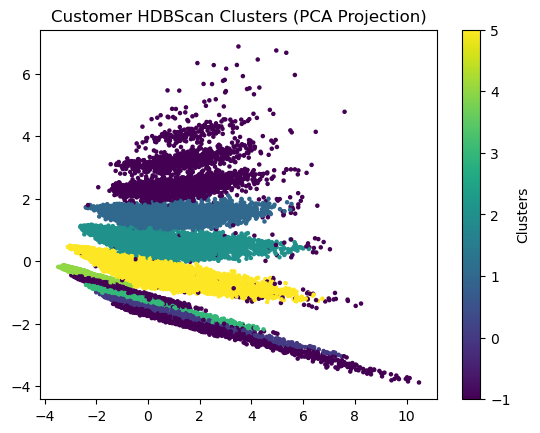

In [19]:
plt.scatter(c_cust_PCA[:,0], c_cust_PCA[:,1], c=c_hdb_labels,cmap='viridis', s=5)
plt.title ("Customer HDBScan Clusters (PCA Projection)")
plt.colorbar(label='Clusters')
plt.show()

In [15]:
# Creating a copy of the dataframe
ds_hdbscan=ds_cust.copy()

# adding the hdbscan data
ds_hdbscan['cluster']=c_hdb_labels
hdbscan_summary=ds_hdbscan.groupby('cluster').mean()
print("HDBScan Cluster Summary:")
print(hdbscan_summary)

HDBScan Cluster Summary:
         CustomerTotalSpend  CustomerOrderCount  AvgOrderValue  \
cluster                                                          
-1                 0.160147            0.080374       0.243301   
 0                -0.579697           -1.044505       0.426512   
 1                 0.950689            1.341939       0.010461   
 2                 0.371267            0.546457      -0.008211   
 3                -0.748403           -1.044505      -0.047520   
 4                -1.090370           -1.044505      -1.008384   
 5                -0.187819           -0.249024      -0.016986   

         AvgDiscountRate  AvgQuantity  AvgSunkCost  
cluster                                             
-1              0.065153     0.332526     0.279723  
 0             -0.069583     0.929371     0.491002  
 1             -0.008511     0.005054     0.012093  
 2             -0.001608    -0.002434    -0.009282  
 3             -0.050169    -0.000458    -0.054448  
 4       

#### HDBSCAN Intrepretation

- Cluster -1 : Noise cluster, midly above average generalist who don't form a tight cluster
- Cluster  0 : Occasional Bulk Buyers: Low Frequeny, high average order value, high quantity and high sunk costs
- Cluster  1 : High frequency loyalist:  High order amount and high order count.
- Cluster  2 : Moderately engaged steady buyers : Slighly above spend and frequency balanced behavior.
- Cluster  3 : Low engagement minimalist : very low spend, low frequency and small orders
- Cluster  4 : Ultra low value discount : Spends low amounts, low quantity, but will slightly take advantage of discounts.
- Cluster  5 : Typical average customers : almost zero z score in all categories. what is considered average on all levels.

#### Model choice and reasoning.

I chose HDBSCAN over KMeans as the final custering model primarily because of how it handles noise.

- KMeans forces every customer into one of the predefined clusters, even when a customers behavior does not clearly align with any segment. This can result in customers being assigned to clusters they don't truly belong to, which can blur segment definitions.

- HDBSCAN, on the other hand, allows customers to remain unassigned when they do not fit well into any cluster. This produces tigher, more behaviorally consistent clusters and reduces the risk of misclassification.

- This is especially important since the clusters will be used to make marketing recommendations. Assigning customers to the wrong segment could lead to poorly targeted campaigns and wastered marketing spend. By explicitly identifying noise, HDBSCAN provides more reliable segments for downstream decision-Making

# Recommendations for each clusters

- Cluster -1 : Noise Cluster:  Do not allocated targeting marketing spend to this group. Continue collecting behavioral data until a clear purchasing pattern emerges and teh customer can be confidently assigned to a cluster.
- Cluster  0 : Occasional Bulk Buyers: Offer volume based incentives such as bulk discounts or a bulk focused subscribe and save option. (order x items every y months for a discounted price) focus on increasing order regularity rather than frequency.
- Cluster  1 : High frequency loyalist:  Provide early access to deals, exclusive loyalty perks, and highly personalized product recommendations. The goal is retention and increasing lifetime value reather than increasing purchase frequency.
- Cluster  2 : Moderately engaged steady buyers : Promote complementary and commonly bundled items. Introduce incentives such as loyalty program enrollment or limited access to features offered to high-frequency loyalist to encourage conversion into a higher value segment.
- Cluster  3 : Low engagement minimalist : Use purchase history and browsing/watch list behavior to send targeted recommendations. Focus on relevance rather than discounts to increase engagement without over-incentivizing.
- Cluster  4 : Ultra low value discount : Send notifications for Amazon haul deals and deep-discount offers ($0.01 items). The objective is to increase site visits and engagement frequency while keeping acquisition costs low.
- Cluster  5 : Typical average customers : Maintain standard marketing strategies, including watch-list alerts and recommendation items. Monitor for behavioral shifts that may indicate movement into higher or lower value segments

## Seasonality

In [27]:
# Creating a fitler to only keep the percentage of orders in a month
season_cols= [c for c in ds_sea.columns if c.startswith('PctOrdersInMonth_')]

# Creating a copy of the dataframe
ds_sea_use=ds_sea[season_cols].copy()

In [28]:
ds_sea_use

,PctOrdersInMonth_OrdersInMonth_1,PctOrdersInMonth_OrdersInMonth_2,PctOrdersInMonth_OrdersInMonth_3,PctOrdersInMonth_OrdersInMonth_4,PctOrdersInMonth_OrdersInMonth_5,PctOrdersInMonth_OrdersInMonth_6,PctOrdersInMonth_OrdersInMonth_7,PctOrdersInMonth_OrdersInMonth_8,PctOrdersInMonth_OrdersInMonth_9,PctOrdersInMonth_OrdersInMonth_10,PctOrdersInMonth_OrdersInMonth_11,PctOrdersInMonth_OrdersInMonth_12
0,-0.404721,-0.378593,-0.399174,-0.394401,-0.402466,-0.397179,4.288746,-0.404826,-0.395376,-0.394766,-0.390965,-0.398805
1,-0.404721,1.256176,1.168632,-0.394401,-0.402466,-0.397179,1.148283,-0.404826,-0.395376,-0.394766,-0.390965,-0.398805
2,-0.404721,-0.378593,-0.399174,-0.394401,-0.402466,-0.397179,-0.398512,-0.404826,-0.395376,-0.394766,-0.390965,4.376985
3,-0.404721,-0.378593,-0.399174,-0.394401,-0.402466,2.806876,1.148283,-0.404826,-0.395376,-0.394766,-0.390965,-0.398805
4,-0.404721,-0.378593,4.351753,-0.394401,-0.402466,-0.397179,-0.398512,-0.404826,-0.395376,-0.394766,-0.390965,-0.398805
...,...,...,...,...,...,...,...,...,...,...,...,...
43228,1.934902,-0.378593,-0.399174,-0.394401,-0.402466,-0.397179,-0.398512,-0.404826,-0.395376,-0.394766,-0.390965,1.989090
43229,-0.404721,-0.378593,-0.399174,-0.394401,-0.402466,4.384993,-0.398512,-0.404826,-0.395376,-0.394766,-0.390965,-0.398805
43230,-0.404721,-0.378593,-0.399174,-0.394401,-0.402466,-0.397179,-0.398512,1.924733,1.986182,-0.394766,-0.390965,-0.398805
43231,-0.404721,-0.378593,-0.399174,-0.394401,-0.402466,-0.397179,-0.398512,4.254291,-0.395376,-0.394766,-0.390965,-0.398805


In [29]:
# Calculating the silhouette scores to determine the optimal number of clusters

seas_sil_scores={}

for k in range(2,13):
    km=KMeans(n_clusters=k, random_state=42)
    s_labels=km.fit_predict(ds_sea_use)
    s_sil=silhouette_score(ds_sea_use,s_labels)
    seas_sil_scores[k]=s_sil
seas_sil_scores

{2: 0.06283817576481841,
 3: 0.09225519465683202,
 4: 0.12421434872283184,
 5: 0.1438692513544626,
 6: 0.16841887637399922,
 7: 0.19172260138742087,
 8: 0.2203197217027401,
 9: 0.23383994328477165,
 10: 0.25316614935962933,
 11: 0.24599298128400102,
 12: 0.2758512757805067}

In [31]:
# Sorting the customer silhouette scores
ss=pd.DataFrame(seas_sil_scores.items(), columns=['k', 'silhouette_score'])
ss_sorted=ss.sort_values('silhouette_score', ascending=False).reset_index(drop=True)
print(ss_sorted)

     k  silhouette_score
0   12          0.275851
1   10          0.253166
2   11          0.245993
3    9          0.233840
4    8          0.220320
5    7          0.191723
6    6          0.168419
7    5          0.143869
8    4          0.124214
9    3          0.092255
10   2          0.062838


#### Choosing clusters. 
Based on the Silhoutte Scores, choosing 12 clusters (matches the numbers of months) is the best number for the data

In [33]:
# Fitting kmeans with 12 clusters
s_kmeans=KMeans(n_clusters=12, random_state=42)
s_kmeans_labels=s_kmeans.fit_predict(ds_sea_use)

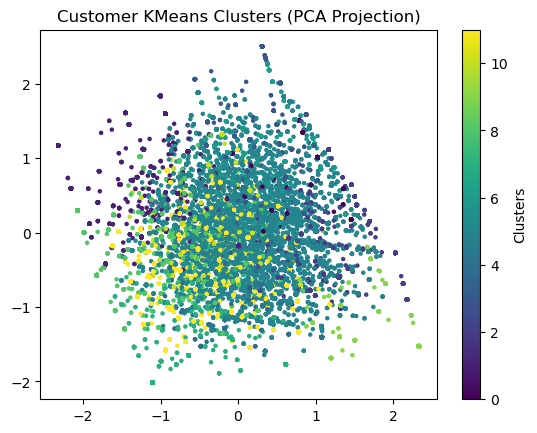

In [34]:
# Visualizing the clusters with PCA

s_PCA=PCA(n_components=2)
s_seas_PCA=s_PCA.fit_transform(ds_sea_use)

plt.scatter(s_seas_PCA[:,0], s_seas_PCA[:,1], c=s_kmeans_labels,cmap='viridis', s=5)
plt.colorbar(label='Clusters')
plt.title ("Customer KMeans Clusters (PCA Projection)")
plt.show()

In [36]:
# Creating a copy of the dataframe
ds_sea_kmeans=ds_sea_use.copy()

# adding the kmeans data
ds_sea_kmeans['cluster']=s_kmeans_labels
s_kmeans_summary=ds_sea_kmeans.groupby('cluster').mean()
print("KMeans Cluster Summary:")
print(s_kmeans_summary)

KMeans Cluster Summary:
         PctOrdersInMonth_OrdersInMonth_1  PctOrdersInMonth_OrdersInMonth_2  \
cluster                                                                       
0                               -0.384797                         -0.361953   
1                               -0.246574                         -0.348994   
2                               -0.381291                         -0.355554   
3                               -0.365990                         -0.345921   
4                               -0.379533                         -0.347263   
5                               -0.038789                         -0.189742   
6                               -0.236696                         -0.354994   
7                                2.959728                         -0.350145   
8                               -0.180747                         -0.361331   
9                               -0.386121                         -0.351848   
10                          

#### KMeans Interpretation

- Cluster 0  : Customers in Cluster 0 see a spike in purchases during Month 9 (September)
- Cluster 1  : Customers in Cluster 1 see a spike in purchasing during Month 12 (December)
- Cluster 2  : Customers in Cluster 2 see a spike in purchasing during Month 11 (November)
- Cluster 3  : Customers in Cluster 3 see a spike in purchasing during Month 5 and 10 (May & October)
- Cluster 4  : Customers in Cluster 4 see a spike in purchasing during Month 4 (April)
- Cluster 5  : Customers in Cluster 5 does not see a spike during any Month (Not affected by seasonality)
- Cluster 6  : Customers in Cluster 6 see a spike in purchasing during Month 3 (March)
- Cluster 7  : Customers in Cluster 7 see a spike in purchasing during Month 1 (January)
- Cluster 8  : Customers in Cluster 8 see a spike in purchasing during Month 6 (June)
- Cluster 9  : Customers in Cluster 9 see a spike in purchasing during Month 7 (July)
- Cluster 10 : Customers in Cluster 10 see a spike in purchasing during Month 8 (August)
- Cluster 11 : Customers in Cluster 11 see a spike in purchasing during Month 2 (Febuary)

In [40]:
# Clustering the data based on HDBScan
s_hdb=hdbscan.HDBSCAN(min_cluster_size=400, min_samples=10)
s_hdb_labels=s_hdb.fit_predict(ds_sea_use)

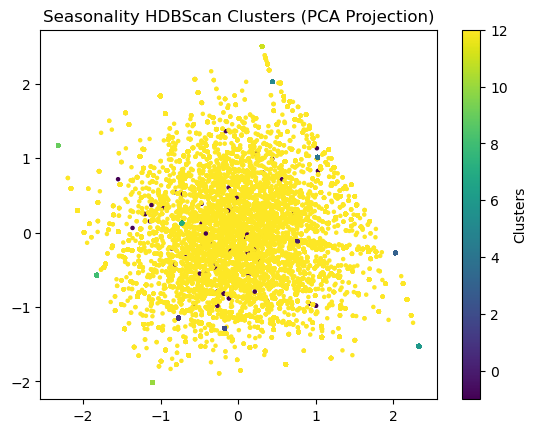

In [41]:
plt.scatter(s_seas_PCA[:,0], s_seas_PCA[:,1], c=s_hdb_labels,cmap='viridis', s=5)
plt.title ("Seasonality HDBScan Clusters (PCA Projection)")
plt.colorbar(label='Clusters')
plt.show()

In [42]:
# Creating a copy of the dataframe
ds_sea_hdbscan=ds_sea_use.copy()

# adding the hdbscan data
ds_sea_hdbscan['cluster']=s_hdb_labels
hdbscan_summary=ds_sea_hdbscan.groupby('cluster').mean()
print("HDBScan Cluster Summary:")
print(hdbscan_summary)

HDBScan Cluster Summary:
         PctOrdersInMonth_OrdersInMonth_1  PctOrdersInMonth_OrdersInMonth_2  \
cluster                                                                       
-1                              -0.014989                          0.201528   
 0                              -0.404721                         -0.378593   
 1                              -0.404721                          4.575250   
 2                              -0.404721                         -0.378593   
 3                              -0.404721                         -0.378593   
 4                              -0.404721                         -0.378593   
 5                              -0.404721                         -0.378593   
 6                              -0.404721                         -0.378593   
 7                              -0.404721                         -0.378593   
 8                              -0.404721                         -0.378593   
 9                         

#### HDBSCAN interpretation
- Cluster  -1: Noise cluster: Customers in this cluters need more data before they can be clustetered.
- Cluster   0: Customers in this cluster have a spike in purchase in October
- Cluster   1: Customers in this cluster have a spike in purchase in February
- Cluster   2: Customers in this cluster have a spike in purchase in April
- Cluster   3: Customers in this cluster have a spike in purchase in November
- Cluster   4: Customers in this cluster have a spike in purchase in September
- Cluster   5: Customers in this cluster have a spike in purchase in March
- Cluster   6: Customers in this cluster have a spike in purchase in July
- Cluster   7: Customers in this cluster have a spike in purchase in August
- Cluster   8: Customers in this cluster have a spike in purchase in June
- Cluster   9: Customers in this cluster have a spike in purchase in December
- Cluster  10: Customers in this cluster have a spike in purchase in January
- Cluster  11: Customers in this cluster have a spike in purchase in May 
- Cluster  12: Customers in this cluster make purchases year round

## Model Choice and recommendation

I actually decided there was no good model for this. Due to the synthetic data limitations, customers are perfectly separated by months. In real-world data, we'd expect broader seasonal patterns, rather than month-specific clusters. With real data, HDBSCAN would be the recommended approach as it can identify varying density seasonal segments and handle noise effectively.